In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

In [2]:
!git clone https://github.com/alleFarell/Datasets-ML.git

fatal: destination path 'Datasets-ML' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('Datasets-ML/forestfires.csv', sep=',', na_values='?')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<AxesSubplot:>

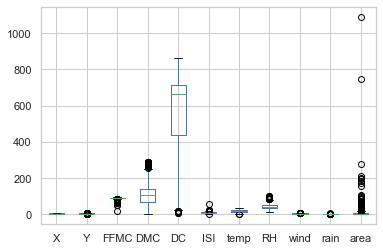

In [4]:
df.plot(kind='box')

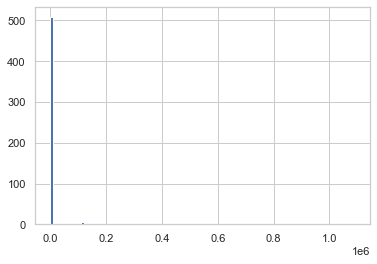

Percentage of zero occurance : 0.47775628626692457


In [5]:
x = df.area * 1000
plt.hist(x,width=10000)
plt.show()
## zero percentage
l = df['area'][df.area==0]
prob = len(l)/len(df.area)

print("Percentage of zero occurance :",prob)

<AxesSubplot:>

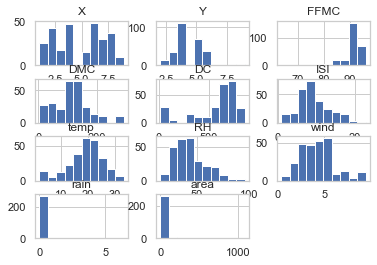

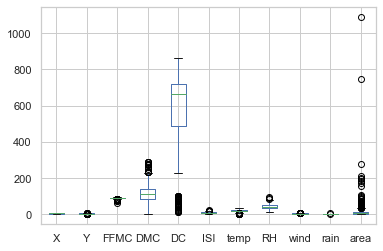

In [6]:
df_2 = df[df.area!=0]
df_2.hist()
df_2.plot(kind='box')

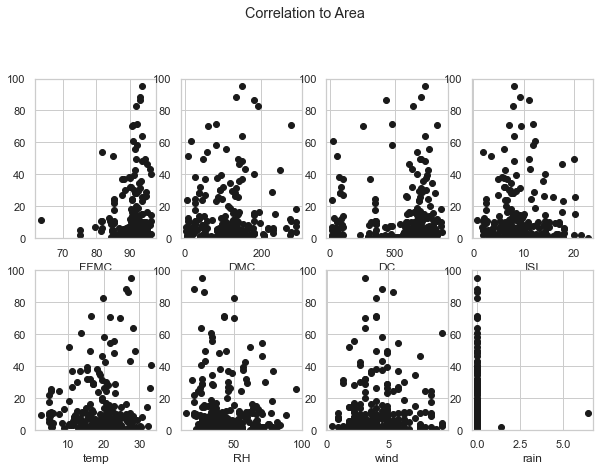

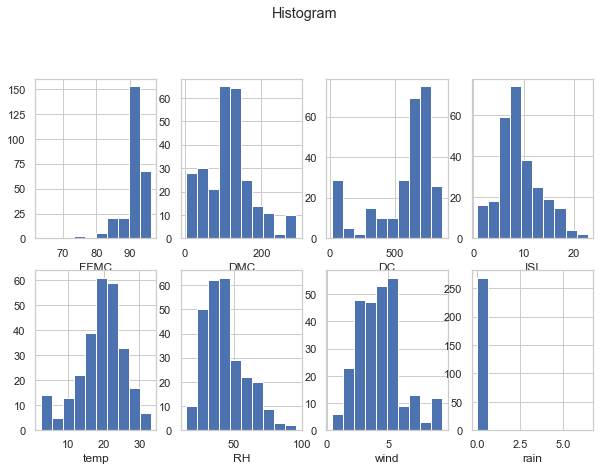

In [7]:
##plotting to area without zero area
columns = df_2.columns
col_feature = columns[4:-1]
col_label = columns[-1]

plt.figure(figsize=(10,10))
for i in range(len(col_feature)):
    plt.subplot(3,4,i+1)
    plt.plot(df_2[col_feature[i]],df_2[col_label],'ko')
    plt.xlabel(col_feature[i])
    plt.ylim(0,100)
plt.suptitle('Correlation to Area')
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(col_feature)):
    plt.subplot(3,4,i+1)
    plt.hist(df_2[col_feature[i]])
    plt.xlabel(col_feature[i])
plt.suptitle('Histogram')
plt.show()

In [ ]:
def geological_plot(data,hue):
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    g = sns.relplot(
        data=df_2,
        x="X", y="Y",
        hue=hue, size='area',
        palette=cmap, sizes=(10, 200),
    )
#g.set(xscale="log", yscale="log")
    g.ax.xaxis.grid(True, "minor", linewidth=.25)
    g.ax.yaxis.grid(True, "minor", linewidth=.25)
    g.despine(left=True, bottom=True)
    plt.show()

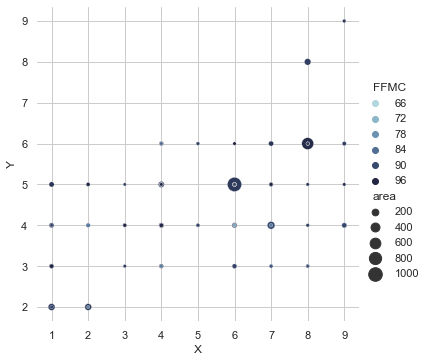

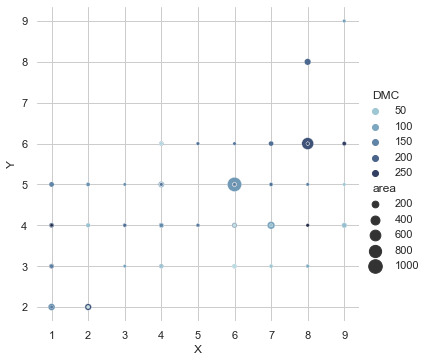

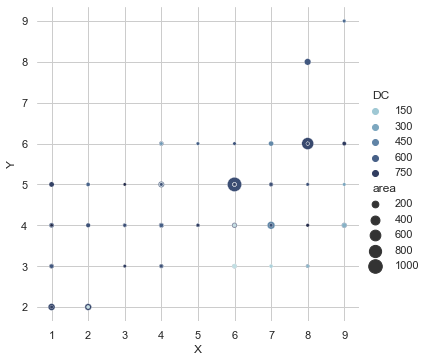

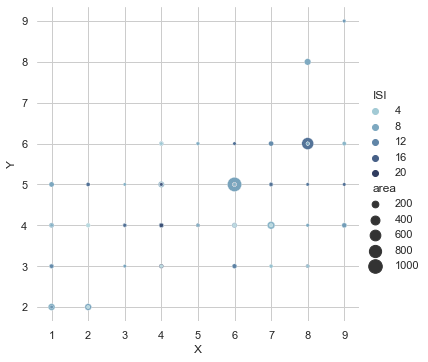

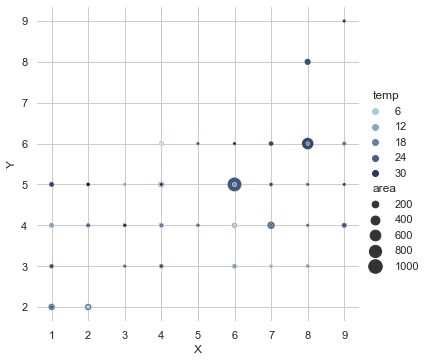

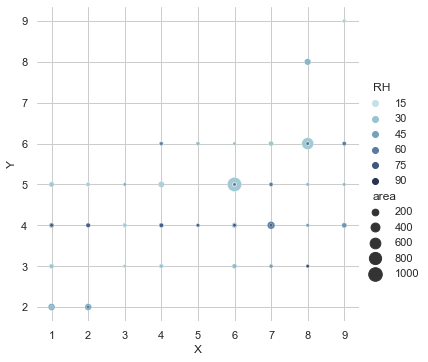

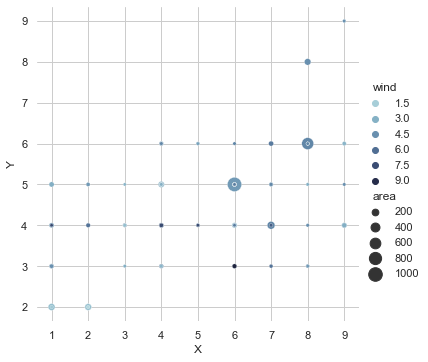

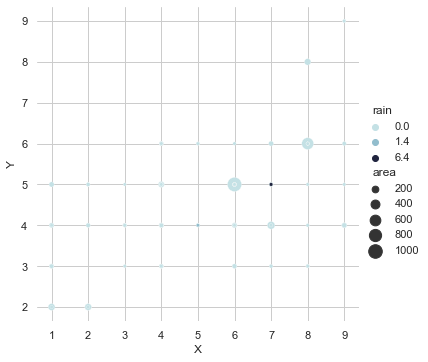

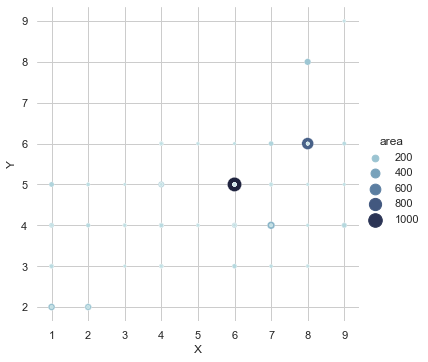

In [18]:
for i in range(len(df_2.columns)):
    if i >=4:
        geological_plot(df_2,df_2.columns[i])

### Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = df_2[col_feature].values
y = df_2[col_label].values
y = list(map(int,y))
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.09876543209876543

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.014832478341661903